In [2]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

In [4]:
file = open("data.txt", "r")
y = []
x = []
dict = {}
i = 0

In [5]:
for line in file:
    if i > 5:
        index = i-6
        lineParts = line.strip().split(",")
        dict[index] = [lineParts[1],lineParts[2],lineParts[3],lineParts[4]]

    i += 1

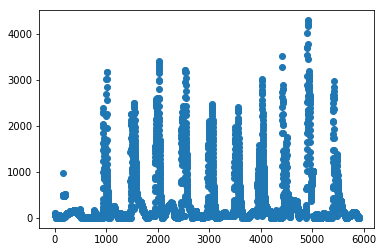

In [6]:
x = list(dict.keys())
y = []
for key,value in dict.items():
    y.append(abs(float((value[1]))))
plt.scatter(x, y)
plt.show()